In [42]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [43]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic


In [44]:
df = pd.read_csv("./Java/output/ExpVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,exp,Error Deviation,Value Deviation,Uncertainty,Mean,Bias,Leak,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
0,Gaussian,0.2,-10.0,0.000045,1.00806,0.000009,0.000009,9.080000e-07,9.171380e-07,0.0,...,0.001,0.0008,0.0005,0.0006,0.0003,0.0,0.0,0.0002,0.0001,NaN
1,Gaussian,0.2,-5.0,0.006738,1.00806,0.001400,0.001389,1.347590e-04,1.361150e-04,0.0,...,0.001,0.0008,0.0005,0.0006,0.0003,0.0,0.0,0.0002,0.0001,NaN
2,Gaussian,0.2,-2.0,0.135335,1.00806,0.028117,0.027892,2.706710e-03,2.733950e-03,0.0,...,0.001,0.0008,0.0005,0.0006,0.0003,0.0,0.0,0.0002,0.0001,NaN
3,Gaussian,0.2,-1.0,0.367879,1.00806,0.076429,0.075819,7.357600e-03,7.431650e-03,0.0,...,0.001,0.0008,0.0005,0.0006,0.0003,0.0,0.0,0.0002,0.0001,NaN
4,Gaussian,0.2,0.0,1.000000,1.00806,0.207757,0.206097,2.000000e-02,2.020130e-02,0.0,...,0.001,0.0008,0.0005,0.0006,0.0003,0.0,0.0,0.0002,0.0001,NaN


In [45]:
sorted(df['Noise'].unique())

[0.01, 0.02, 0.05, 0.1, 0.2]

# Deviation vs Uncertainty

In [46]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sorted(df['Noise'].unique()), noiseType='Gaussian',
                sStyle=['+', '-', '--', 'x'], sColor = ['r','g','b','y','c','m'],
                logx=False, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title('e^(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}', markersize=10)
    ax.legend(bbox_to_anchor=(1.1, 1.05))

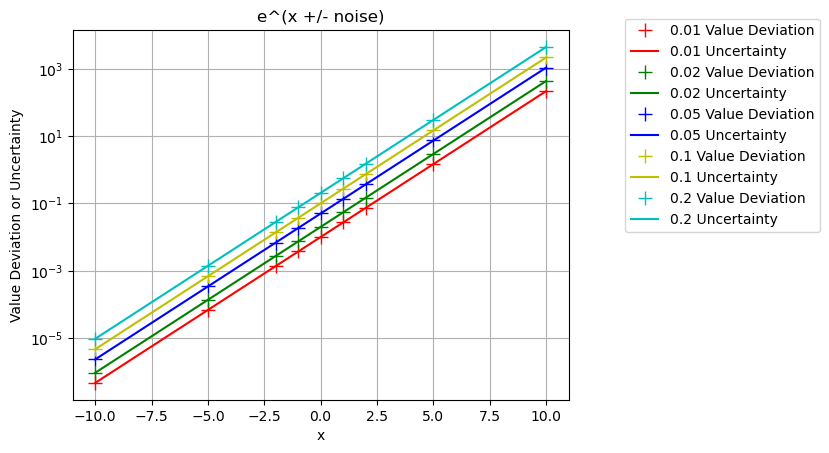

In [47]:
PlotValues()

In [61]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sorted(df['Noise'].unique()),
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    #ax2.set_yscale('log')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.15, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

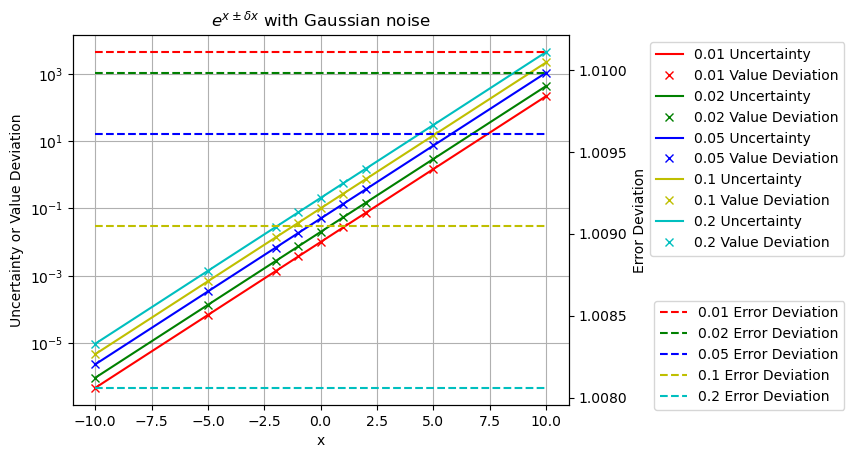

In [62]:
PlotErrorDev()

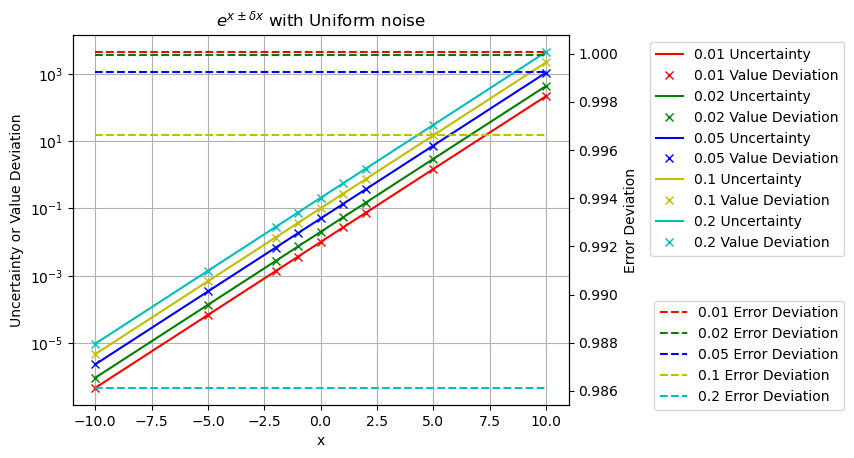

In [63]:
PlotErrorDev('Uniform')

# Mean vs Bias

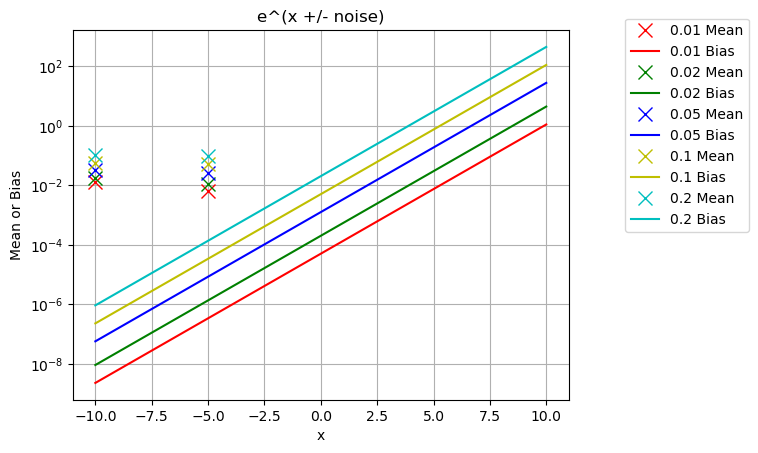

In [20]:
PlotValues(sValue=['Mean', 'Bias'], sStyle=['x', '-'])

# Histogram

In [21]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.0,0.0,0.0001,0.0006,0.0013,0.003501,0.009102,0.016003,0.026205,0.038408,...,0.035007,0.030406,0.022704,0.017203,0.013603,0.009702,0.006401,0.005001,0.003501,0.003401
1,0.0,0.0,0.0001,0.0006,0.0013,0.003501,0.009102,0.016003,0.026205,0.038408,...,0.035007,0.030406,0.022704,0.017203,0.013603,0.009702,0.006401,0.005001,0.003501,0.003401
2,0.0,0.0,0.0001,0.0006,0.0013,0.003501,0.009102,0.016003,0.026205,0.038408,...,0.035007,0.030406,0.022704,0.017203,0.013603,0.009702,0.006401,0.005001,0.003501,0.003401
3,0.0,0.0,0.0001,0.0006,0.0013,0.003501,0.009102,0.016003,0.026205,0.038408,...,0.035007,0.030406,0.022704,0.017203,0.013603,0.009702,0.006401,0.005001,0.003501,0.003401
4,0.0,0.0,0.0001,0.0006,0.0013,0.003501,0.009102,0.016003,0.026205,0.038408,...,0.035007,0.030406,0.022704,0.017203,0.013603,0.009702,0.006401,0.005001,0.003501,0.003401


In [22]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


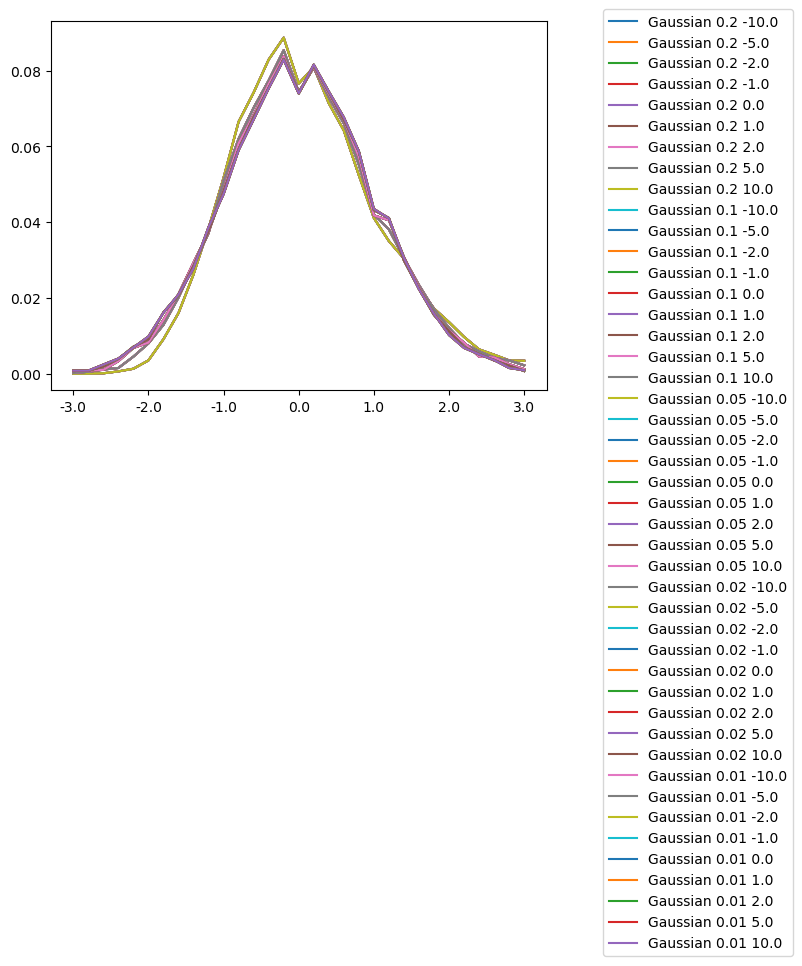

In [23]:
PlotHisto(sNoiseType=['Gaussian'])

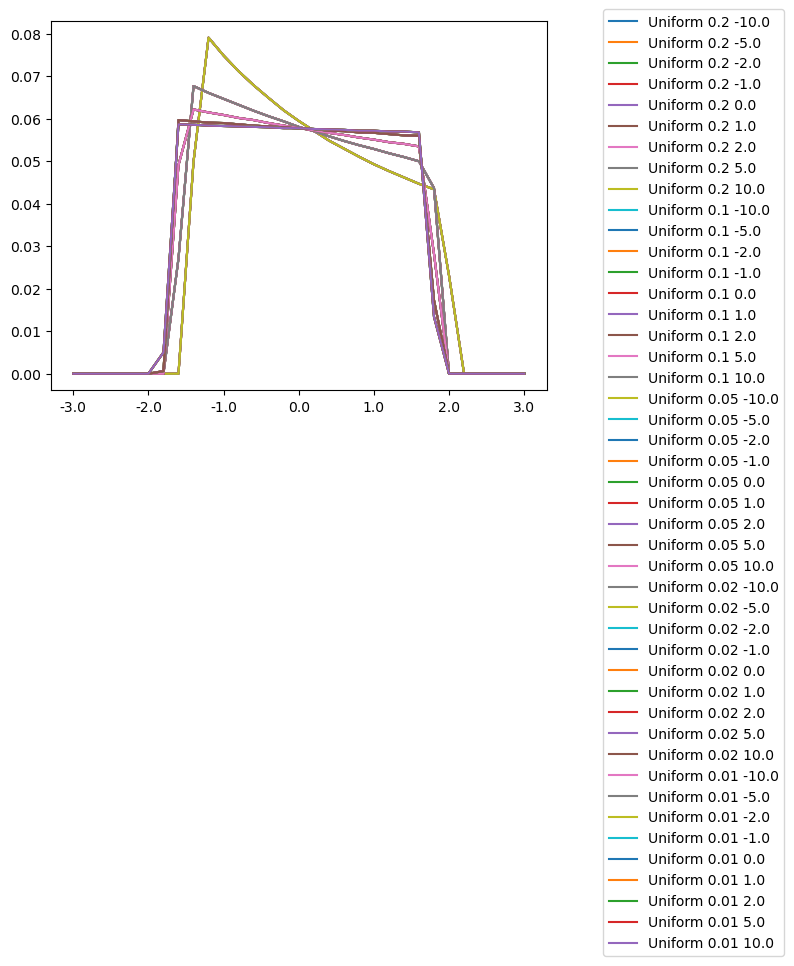

In [24]:
PlotHisto()

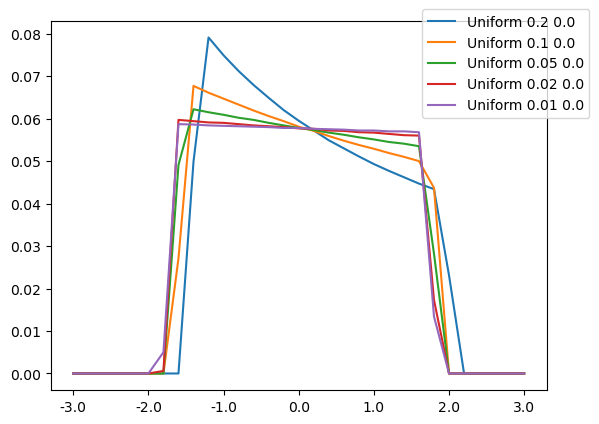

In [25]:
PlotHisto(sX=[0])

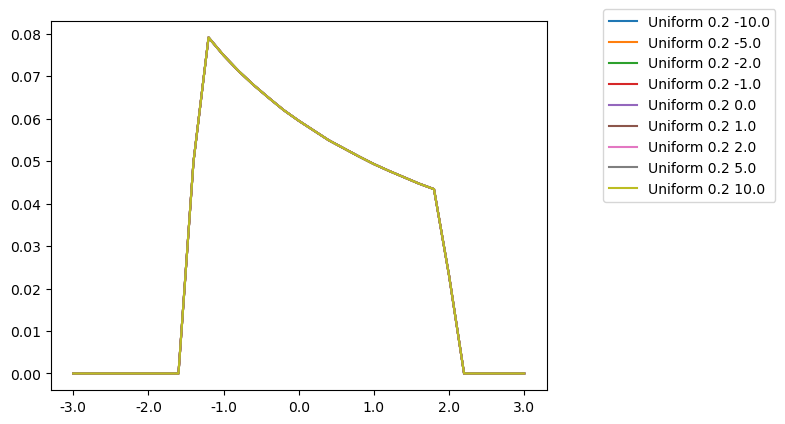

In [26]:
PlotHisto(sNoise=[0.2])